# Import Any Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mclrs
import seaborn as sns
import datetime as dt
from operator import attrgetter
pd.options.mode.copy_on_write = True

C:\Users\Norman Dwi Febrio\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Transform The Dataset Into Pandas DataFrame

In [2]:
df = pd.read_csv("Salinan Online Retail Data.csv")
df.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


# Data Assessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


Pada dataset yang digunakan, terdapat 7 kolom dan terdapat kesalahan _data type_ pada kolom `order_date` yang mana seharusnya berupa datetime64.

In [4]:
df.isnull().sum()

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64

Terdapat nilai Null pada kolom `product_name` dan `customer_id`. Karena pada proyek ini kita akan melakukan analisis _user retention_, maka kita akan mengeleminasi baris yang nilai pada kolom `customer_id`-nya adalah Null.

# Data Cleaning

Dari temuan di atas, diketahui bahwa dataset masih diperlukan pembersihan, seperti mengubah tipe data dari suatu kolom dan eliminasi nilai Null.

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d') # Mengubah tipe data kolom `order_date`
df_user_non_null = df[~(df['customer_id'].isnull())] # Mengeliminasi baris yang bernilai null pada kolom `customer_id`
df_user_non_null

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
6,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0
7,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0
...,...,...,...,...,...,...,...
461740,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0
461741,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0
461742,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0
461743,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0


In [6]:
df_user_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360853 entries, 0 to 461744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360853 non-null  object        
 1   product_code  360853 non-null  object        
 2   product_name  360853 non-null  object        
 3   quantity      360853 non-null  int64         
 4   order_date    360853 non-null  datetime64[ns]
 5   price         360853 non-null  float64       
 6   customer_id   360853 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 22.0+ MB


In [7]:
df_user_non_null.isnull().sum().sum()

0

Dataset yang digunakan telah disesuaikan. Saatnya untuk lanjut ke analisis _user retention_.

# User Retention

Pada proyek ini, kolom yang relevan untuk melakukan analisis _user retention_ adalah kolom `customer_id`, `order_date`, dan `order_id`. Oleh karena itu, kolom yang lain akan dieliminasi agar lebih efisien ketika menjalankan program.

In [8]:
df_clean = df_user_non_null.copy()
df_clean = df_clean[['customer_id','order_date','order_id']]
df_clean

,customer_id,order_date,order_id
0,12346.0,2010-01-04 09:24:00,493410
1,14590.0,2010-01-04 09:43:00,C493411
2,12346.0,2010-01-04 09:53:00,493412
6,14590.0,2010-01-04 10:28:00,493414
7,14590.0,2010-01-04 10:28:00,493414
...,...,...,...
461740,18116.0,2010-12-23 16:06:00,539988
461741,18116.0,2010-12-23 16:06:00,539988
461742,18116.0,2010-12-23 16:06:00,539988
461743,18116.0,2010-12-23 16:06:00,539988


Buat kolom baru dengan nama `yr_mnth` yang menyimpan nilai tahun dan bulan dari transaksi yang dilakukan oleh pengguna.

In [9]:
df_clean['yr_mnth'] = df_clean['order_date'].dt.to_period('M')
df_clean

,customer_id,order_date,order_id,yr_mnth
0,12346.0,2010-01-04 09:24:00,493410,2010-01
1,14590.0,2010-01-04 09:43:00,C493411,2010-01
2,12346.0,2010-01-04 09:53:00,493412,2010-01
6,14590.0,2010-01-04 10:28:00,493414,2010-01
7,14590.0,2010-01-04 10:28:00,493414,2010-01
...,...,...,...,...
461740,18116.0,2010-12-23 16:06:00,539988,2010-12
461741,18116.0,2010-12-23 16:06:00,539988,2010-12
461742,18116.0,2010-12-23 16:06:00,539988,2010-12
461743,18116.0,2010-12-23 16:06:00,539988,2010-12


Kelompokkan data berdasarkan `customer_id` dan `yr_mnth`. Kolom yang akan diagregasi adalah kolom `order_id` dengan metode agregasi `nunique` untuk mendapatkan total order_id unik berdasarkan pengelompokan tersebut. 

In [10]:
df_user_monthly = df_clean.groupby(['customer_id','yr_mnth'])['order_id'].nunique().reset_index()
df_user_monthly = df_user_monthly.rename(columns={'order_id':'order_cnt'})
df_user_monthly

,customer_id,yr_mnth,order_cnt
0,12346.0,2010-01,5
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,2
4,12608.0,2010-10,1
...,...,...,...
12199,18286.0,2010-06,1
12200,18286.0,2010-08,1
12201,18287.0,2010-05,1
12202,18287.0,2010-09,2


Buat kolom baru lagi dengan nama `cohort` yang menyimpan nilai pada tahun dan bulan berapa pengguna tersebut melakukan transaksi pertama kali.

In [11]:
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['yr_mnth'].transform('min')
df_user_monthly

,customer_id,yr_mnth,order_cnt,cohort
0,12346.0,2010-01,5,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,2,2010-01
4,12608.0,2010-10,1,2010-10
...,...,...,...,...
12199,18286.0,2010-06,1,2010-06
12200,18286.0,2010-08,1,2010-06
12201,18287.0,2010-05,1,2010-05
12202,18287.0,2010-09,2,2010-05


Buat kolom baru lagi dengan nama ` period_num` yang menyimpan nilai jarak bulan antara pada saat pertama kali transaksi dengan transaksi-transaksi selanjutnya yang dilakukan oleh pengguna.

In [12]:
df_user_monthly['period_num'] = (df_user_monthly['yr_mnth'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly

,customer_id,yr_mnth,order_cnt,cohort,period_num
0,12346.0,2010-01,5,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,2,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
12199,18286.0,2010-06,1,2010-06,1
12200,18286.0,2010-08,1,2010-06,3
12201,18287.0,2010-05,1,2010-05,1
12202,18287.0,2010-09,2,2010-05,5


Gunakan `pivot_table` dari modul Pandas untuk membuat tabel pivot dari DataFrame di atas. Isi dari tabel pivot ini adalah kolom `cohort` sebagai index, kolom `period_num` sebagai columns, dan kolom `customer_id` sebagai values. Agregasi yang digunakan adalah `pd.Series.nunique` yang mana akan mengembalikan total customer_id unik.

In [13]:
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort',
                                 columns='period_num', values='customer_id',
                                 aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,719.0,284.0,338.0,319.0,310.0,310.0,296.0,273.0,292.0,331.0,341.0,254.0
2010-02,464.0,155.0,128.0,165.0,152.0,123.0,121.0,161.0,155.0,168.0,101.0,NaN
2010-03,540.0,146.0,160.0,146.0,140.0,125.0,150.0,189.0,195.0,99.0,NaN,NaN
2010-04,333.0,82.0,76.0,63.0,71.0,80.0,99.0,102.0,51.0,NaN,NaN,NaN
2010-05,275.0,56.0,50.0,53.0,51.0,73.0,66.0,43.0,NaN,NaN,NaN,NaN
2010-06,278.0,55.0,56.0,59.0,64.0,85.0,38.0,NaN,NaN,NaN,NaN,NaN
2010-07,180.0,39.0,37.0,52.0,53.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,232.0,67.0,61.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ubah nilai dari tabel pivot di atas menjadi nilai desimal yang merepresentasikan persentase.

In [14]:
cohort_size = df_cohort_pivot.iloc[:,0] # Mengambil semua nilai pada kolom pertama dari tabel pivot
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0) # Membagi semua nilai tiap kolom dengan kolom pertama pada baris yang sama
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.394993,0.470097,0.443672,0.431154,0.431154,0.411683,0.379694,0.406120,0.460362,0.474270,0.353268
2010-02,1.0,0.334052,0.275862,0.355603,0.327586,0.265086,0.260776,0.346983,0.334052,0.362069,0.217672,NaN
2010-03,1.0,0.270370,0.296296,0.270370,0.259259,0.231481,0.277778,0.350000,0.361111,0.183333,NaN,NaN
2010-04,1.0,0.246246,0.228228,0.189189,0.213213,0.240240,0.297297,0.306306,0.153153,NaN,NaN,NaN
2010-05,1.0,0.203636,0.181818,0.192727,0.185455,0.265455,0.240000,0.156364,NaN,NaN,NaN,NaN
2010-06,1.0,0.197842,0.201439,0.212230,0.230216,0.305755,0.136691,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.216667,0.205556,0.288889,0.294444,0.172222,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.288793,0.262931,0.137931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cohort Retention Rate Visualization

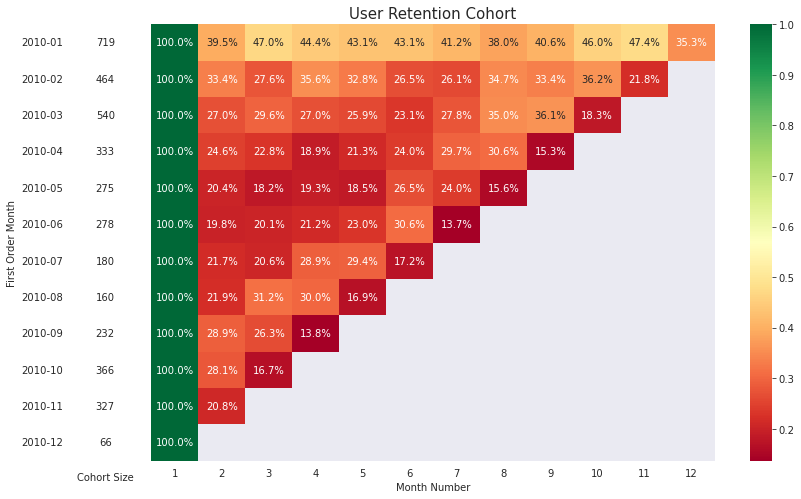

In [25]:
with sns.axes_style('darkgrid'):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), sharey=True, gridspec_kw={'width_ratios':[1,10]})
    
    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.1%', cmap='RdYlGn', ax=axs[1])
    axs[1].set_title('User Retention Cohort', fontsize=15)
    axs[1].set(xlabel='Month Number', ylabel='')
    
    # Cohort Size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mclrs.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=axs[0])
    axs[0].tick_params(bottom=False)
    axs[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])
    fig.tight_layout()
    plt.savefig('Cohort Retention.png')

# Conclusion

Dari grafik heatmap di atas, dapat disimpulkan bahwa:
1. Analisis ini dilakukan untuk mengetahui _retention rate_ pada tahun 2010 saja.
2. Pengguna paling banyak melakukan transaksi pertamanya pada Bulan Januari dengan total 719 pengguna.
3. Cohort Bulan Januari juga menjadi cohort dengan _retention rate_ tertinggi daripada cohort lainnya.
4. Banyaknya pengguna yang kembali bertransaksi pada bulan-bulan selanjutnya tidak ada yang lebih dari 50%. Ini menandakan bahwa  sebagian besar pengguna tidak lagi bertransaksi.
5. Sayangnya pada akhir tahun 2010 yaitu di Bulan Desember, pengguna yang kembali bertransaksi lebih sedikit daripada bulan-bulan sebelumnya. Pengguna yang kembali bertransaksi pada Bulan Desember tidak mencapai 40% dari tiap cohort.